In [ ]:
#install required packages
'''
pydub: manipulate the audio
librosa: audio analysis(feature extraction and visualization) 
'''
!pip install pydub
!pip install pandas
!pip install librosa

In [ ]:
#import the packages
import os
import csv
from pydub import AudioSegment
from pydub.utils import make_chunks
import pandas as pd
import librosa
from librosa import display
import matplotlib.pyplot as plt 
import numpy as np
import zipfile
import wave
import keras
import glob
import shutil
import itertools
import sklearn
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Embedding
from keras.layers import Conv2D, MaxPooling2D, ConvLSTM2D, LSTM, Bidirectional
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from tensorflow.keras.optimizers import SGD
from tensorflow import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Unzip files

In [ ]:
# unzip the zip_file
for zip_num in range(489, 493):
  if os.path.exists('/content/drive/MyDrive/DAIC-WOZ/DAIC-WOZ/'+str(zip_num)+'_P.zip')==False:
    print(str(zip_num) + ' not exist')
  else:
    with zipfile.ZipFile('/content/drive/MyDrive/DAIC-WOZ/DAIC-WOZ/'+str(zip_num)+'_P.zip', 'r') as zip_ref:
      zip_ref.extractall('/content/drive/MyDrive/DAIC-WOZ/DAIC-WOZ/'+str(zip_num)+'_P/')
      print(str(zip_num) + ' unzipped')

489 unzipped
490 unzipped
491 unzipped
492 unzipped


# Transcript

In [ ]:
# dataset for one participate
def read_transript(num):
  print(os.listdir('/content/drive/MyDrive/Colab_Codes/'+str(num)+'_P'))
  p_data = pd.read_csv('/content/drive/MyDrive/Colab_Codes/'+str(num)+'_P/'+str(num)+'_TRANSCRIPT.csv')
  return p_data

In [ ]:
data = read_transript(492)
data

['492_FORMANT.csv', '492_COVAREP.csv', '492_TRANSCRIPT.csv', '492_AUDIO.wav', '492_CLNF_features.txt', '492_CLNF_AUs.txt', '492_CLNF_features3D.txt', '492_CLNF_gaze.txt', '492_CLNF_hog.bin', '492_CLNF_pose.txt']


,start_time\tstop_time\tspeaker\tvalue
0,10.77\t11.65\tParticipant\t<synch>
1,32.152\t53.692\tEllie\tIntroV4Confirmation (hi...
2,53.54\t54.06\tParticipant\tyes
3,55.422\t55.882\tEllie\tokay_confirm (okay)
4,56.845\t59.115\tEllie\thow_doingV (so how are ...
...,...
290,886.374\t888.814\tEllie\tasked_everything (oka...
291,889.513\t890.953\tEllie\tappreciate_open (than...
292,891.758\t892.368\tEllie\tbye (goodbye)
293,891.8\t892.94\tParticipant\tbye and thank you


# Aduio Segmentation

In [ ]:
def audio_segfrom_trans(num):
  p_audio = AudioSegment.from_wav('/content/drive/MyDrive/Colab_Codes/'+str(num)+'_P/'+str(num)+'_AUDIO.wav')
  p_data = read_transript(num)
  for i in range(0,len(p_data)):
    line = p_data.iloc[i].str.split() # transcript split
    # print(line[0][2])
    return line

In [ ]:
def audio_segmentation(num):
  p_audio = AudioSegment.from_wav('/content/drive/MyDrive/Colab_Codes/'+str(num)+'_P/'+str(num)+'_AUDIO.wav')
  p_data = read_transript(num)
  if not os.path.exists('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(num)+'_P/'):
    os.mkdir('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(num)+'_P/')
  sep_num = 0
  for i in range(0,len(p_data)):
    line = p_data.iloc[i].str.split()
    if line[0][2] == 'Participant':
      audio_sep = p_audio[float(line[0][0])*1000: float(line[0][1])*1000]
      sep_num += 1
      audio_sep.export('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(num)+'_P/'+str(sep_num)+'.wav',format="wav")
  audio_sep

In [ ]:
for i in range(300, 351):
  if os.path.exists('/content/drive/MyDrive/Colab_Codes/'+str(i)+'_P/'):
    audio_segmentation(i)
  else:
    print("file not exists")

['300_CLNF_AUs.txt', '300_CLNF_gaze.txt', '300_CLNF_features3D.txt', '300_CLNF_features.txt', '300_AUDIO.wav', '300_CLNF_hog.txt', '300_TRANSCRIPT.csv', '300_CLNF_pose.txt', '300_FORMANT.csv', '300_COVAREP.csv']
['301_CLNF_AUs.txt', '301_AUDIO.wav', '301_CLNF_gaze.txt', '301_CLNF_features3D.txt', '301_CLNF_features.txt', '301_CLNF_hog.bin', '301_TRANSCRIPT.csv', '301_CLNF_pose.txt', '301_FORMANT.csv', '301_COVAREP.csv']
['302_AUDIO.wav', '302_CLNF_AUs.txt', '302_CLNF_features.txt', '302_CLNF_features3D.txt', '302_CLNF_gaze.txt', '302_CLNF_hog.bin', '302_CLNF_pose.txt', '302_COVAREP.csv', '302_FORMANT.csv', '302_TRANSCRIPT.csv']
['303_AUDIO.wav', '303_CLNF_AUs.txt', '303_CLNF_features.txt', '303_CLNF_features3D.txt', '303_CLNF_gaze.txt', '303_CLNF_hog.bin', '303_CLNF_pose.txt', '303_COVAREP.csv', '303_FORMANT.csv', '303_TRANSCRIPT.csv']
['304_AUDIO.wav', '304_CLNF_AUs.txt', '304_CLNF_features.txt', '304_CLNF_features3D.txt', '304_CLNF_gaze.txt', '304_CLNF_hog.bin', '304_CLNF_pose.txt', 

# Aduio wave/ mel spectogram visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


Text(0.5, 1.0, 'Wave')

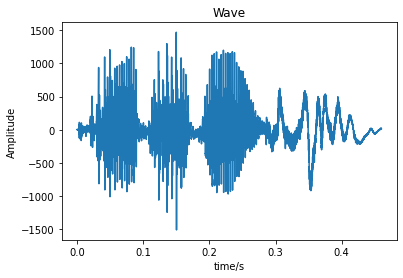

In [ ]:
f = wave.open(r'/content/drive/MyDrive/Colab_Codes/segmentation/483_P/5.wav',"rb")
params = f.getparams()
[nchannels, sampwidth, framerate, nframes] = params[:4] #information of wave
str_data = f.readframes(nframes)
f.close()
wave_data = np.fromstring(str_data,dtype = np.short)
wave_data.shape = -1,2
wave_data = wave_data.T
time = np.arange(0,nframes/2)/framerate # calculate the time from nframes and framerate
plt.plot(time,wave_data[0])
plt.xlabel("time/s")
plt.ylabel("Amplitude")
plt.title('Wave')

In [ ]:
def audiowave_to_spectogram(soundwave):
  audio_ft = librosa.stft(soundwave, n_fft=256)
  audio_amp = librosa.amplitude_to_db(audio_ft)
  spec = audio_amp/100
  return spec

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


[[0.52488446 0.42887375 0.35269365 ... 0.2701547  0.7050787  0.26870492]
 [0.5380985  0.46612847 0.36499938 ... 0.31169036 0.32202336 0.29110068]
 [0.500786   0.43907696 0.46963623 ... 0.51039904 0.41032752 0.40810454]
 ...
 [0.7050787  0.7050787  0.7050787  ... 0.7050787  0.7050787  0.7050787 ]
 [0.7050787  0.7050787  0.7050787  ... 0.7050787  0.7050787  0.7050787 ]
 [0.7050787  0.7050787  0.7050787  ... 0.7050787  0.7050787  0.7050787 ]]


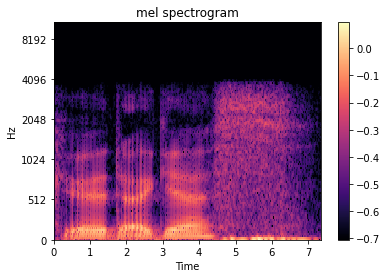

In [ ]:
# draw the spectogram of segmented audio
X, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/segmentation/483_P/5.wav')
spec = audiowave_to_spectogram(X)
librosa.display.specshow(spec,y_axis='mel',x_axis='time')
plt.title('mel spectrogram')
plt.colorbar()
print(abs(spec))

# Audio Combination and Re-segmentation

In [ ]:
# combine the patient audio together
def audio_combine(num):
  filepath="/content/drive/MyDrive/Colab_Codes/segmentation/"+str(num)+"_P/"
  print(filepath)
  # print(os.path.exists(filepath))
  wavelist=[]
  filenames=os.listdir(filepath)
  for filename in filenames:
    name,category=os.path.splitext(filepath+filename)  
    if category=='.wav':  
        wavelist.append(filename)
              
  outfile = "patient_audio.wav"
  output = wave.open(filepath+outfile, 'wb')
  
  setparm = 0
  for infile in wavelist:
    w = wave.open(filepath+infile, 'rb')
    if setparm==0:
        output.setparams(w.getparams())   
        output.writeframes(w.readframes(w.getnframes()))
        setparm = 1
    else:
        output.writeframes(w.readframes(w.getnframes()))
    w.close()

  output.close()

In [ ]:
# segment into 10s per pieces
def aduio_resegm(num):
  audio = AudioSegment.from_file("/content/drive/MyDrive/Colab_Codes/segmentation/"+str(num)+"_P/patient_audio.wav", "wav")
  size = 10000  # 10000ms = 10s
  chunks = make_chunks(audio, size)  # cut the audio into pieces(10s per segmentation)
  for i, chunk in enumerate(chunks):
    chunk_name = "cut{0}.wav".format(i)
    chunk.export("/content/drive/MyDrive/Colab_Codes/segmentation/"+str(num)+"_P/"+chunk_name, format="wav")

In [ ]:
for i in range(300, 351):
  if os.path.exists('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(i)+'_P/'):
    audio_combine(i)
    aduio_resegm(i)

/content/drive/MyDrive/Colab_Codes/segmentation/300_P/
/content/drive/MyDrive/Colab_Codes/segmentation/301_P/
/content/drive/MyDrive/Colab_Codes/segmentation/302_P/
/content/drive/MyDrive/Colab_Codes/segmentation/303_P/
/content/drive/MyDrive/Colab_Codes/segmentation/304_P/
/content/drive/MyDrive/Colab_Codes/segmentation/305_P/
/content/drive/MyDrive/Colab_Codes/segmentation/306_P/
/content/drive/MyDrive/Colab_Codes/segmentation/307_P/
/content/drive/MyDrive/Colab_Codes/segmentation/308_P/
/content/drive/MyDrive/Colab_Codes/segmentation/309_P/
/content/drive/MyDrive/Colab_Codes/segmentation/310_P/
/content/drive/MyDrive/Colab_Codes/segmentation/311_P/
/content/drive/MyDrive/Colab_Codes/segmentation/312_P/
/content/drive/MyDrive/Colab_Codes/segmentation/313_P/
/content/drive/MyDrive/Colab_Codes/segmentation/314_P/
/content/drive/MyDrive/Colab_Codes/segmentation/315_P/
/content/drive/MyDrive/Colab_Codes/segmentation/316_P/
/content/drive/MyDrive/Colab_Codes/segmentation/317_P/
/content/d

In [ ]:
def read_labels(num):
  filename='/content/drive/MyDrive/Colab_Codes/label_comb.csv'
  with open(filename,newline = '',encoding = 'utf-8') as f:
    reader = csv.reader(f)     
    for row in reader: 
      if str(row[0])==str(num):
        label = row[1]
  return label

In [ ]:
# combine all the cuts together
def export_combine():
  dcut_num = 0
  ncut_num = 0
  for tra_num in range(300, 493): # traverse data from 300 to 493
    # all the files in segmentation
    if os.path.exists('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(tra_num)+'_P')==True:
      # read the label of the transcripts
      # load all the cuts into Segmentations folder
      if int(read_labels(tra_num))==1: # depressed
        files = os.listdir('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(tra_num)+'_P')
        for s in files:
          if 'cut' in s:
            shutil.copy('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(tra_num)+'_P/'+s,'/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'+str(dcut_num)+'.wav')
            dcut_num+=1
      elif int(read_labels(tra_num))==0: # non-depressed
        files = os.listdir('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(tra_num)+'_P')
        for s in files:
          if 'cut' in s:
            shutil.copy('/content/drive/MyDrive/Colab_Codes/segmentation/'+str(tra_num)+'_P/'+s,'/content/drive/MyDrive/Colab_Codes/Segmentations/non_depressed/'+str(ncut_num)+'.wav')
            ncut_num+=1
      else:
        print("special situations")


In [ ]:
export_combine() 

# Choose train data(in order)

In [ ]:
# train data and labels
train_mel_matrix = [] # segmentation, shape(129, 3446), store the train matrix
train_label = []

In [ ]:
# add the train data and labels
cut_audio_num = 0
for wave_list in os.listdir('/content/drive/MyDrive/Colab_Codes/segmentation/492_P/'):
  if 'cut' in wave_list:
    cut_audio_num += 1
print(cut_audio_num)
for sep_num in range(0, cut_audio_num):
  sep, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/segmentation/492_P/cut'+str(sep_num)+'.wav')
  train_mel_matrix.append(abs(audiowave_to_spectogram(sep)))
  train_label.append(0) # label of the participants from train_split_Depression.csv

96


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


# Choose train data(random choose)

In [ ]:
# test: random sampling (not replaced)
import numpy as np 
count = 5
t = np.r_[0: 10]
for i in range(count):
  z = np.random.choice(t,1)
  index = np.where(t==z)
  print(z)
  t = np.delete(t,index)

[9]
[5]
[1]
[0]
[6]


In [ ]:
def audiowave_to_spectogram(soundwave):
  audio_ft = librosa.stft(soundwave, n_fft=256)
  audio_amp = librosa.amplitude_to_db(audio_ft)
  spec = audio_amp/100
  return spec

In [ ]:
# choose 200 samples from depressed and non-depressed segmentations (total 100)
c_num = 200
train_mel_matrix = [] 
train_label = []
 
# load unique data from depressed sets of c_num size
t_1 = np.r_[0: len(os.listdir('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'))]
for i in range(c_num):
  z_1 = np.random.choice(t_1,1)
  index = np.where(t_1==z_1)
  sep, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'+str(z_1[0])+'.wav')
  train_mel_matrix.append(abs(audiowave_to_spectogram(sep)))
  train_label.append(1) # label of the participants from train_split_Depression.csv
  t_1 = np.delete(t_1,index)

# load unique data from non-depressed sets of c_num size
t_2 = np.r_[0: len(os.listdir('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'))]
for i in range(c_num):
  z_2 = np.random.choice(t_2,1)
  index = np.where(t_2==z_2)
  sep, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/Segmentations/non_depressed/'+str(z_2[0])+'.wav')
  train_mel_matrix.append(abs(audiowave_to_spectogram(sep)))
  train_label.append(0) # label of the participants from train_split_Depression.csv
  t_2 = np.delete(t_2,index)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


In [ ]:
# choose 20 samples from both depressed and non-depressed segmentations for validation
v_num = 20
val_mel_matrix = [] 
val_label = []
 
# load unique data from depressed sets of c_num size
t_5 = np.r_[0: len(os.listdir('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'))]
for i in range(v_num):
  z_5 = np.random.choice(t_5,1)
  index = np.where(t_5==z_5)
  sep, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'+str(z_1[0])+'.wav')
  val_mel_matrix.append(abs(audiowave_to_spectogram(sep)))
  val_label.append(1) # label of the participants from train_split_Depression.csv
  t_5 = np.delete(t_5,index)

# load unique data from non-depressed sets of c_num size
t_6 = np.r_[0: len(os.listdir('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'))]
for i in range(v_num):
  z_6 = np.random.choice(t_6,1)
  index = np.where(t_6==z_6)
  sep, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/Segmentations/non_depressed/'+str(z_2[0])+'.wav')
  val_mel_matrix.append(abs(audiowave_to_spectogram(sep)))
  val_label.append(0) # label of the participants from train_split_Depression.csv
  t_6 = np.delete(t_6,index)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


In [ ]:
# choose 20 samples from both depressed and non-depressed segmentations for test
t_num = 20
test_mel_matrix = [] 
test_label = []
 
# load unique data from depressed sets of c_num size
t_3 = np.r_[0: len(os.listdir('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'))]
for i in range(t_num):
  z_3 = np.random.choice(t_3,1)
  index = np.where(t_3==z_3)
  sep, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/Segmentations/depressed/'+str(z_3[0])+'.wav')
  test_mel_matrix.append(abs(audiowave_to_spectogram(sep)))
  test_label.append(1) # label of the participants from train_split_Depression.csv
  t_3 = np.delete(t_3,index)

# load unique data from non-depressed sets of c_num size
t_4 = np.r_[0: len(os.listdir('/content/drive/MyDrive/Colab_Codes/Segmentations/non_depressed/'))]
for i in range(t_num):
  z_4 = np.random.choice(t_4,1)
  index = np.where(t_4==z_4)
  sep, sr = librosa.load('/content/drive/MyDrive/Colab_Codes/Segmentations/non_depressed/'+str(z_4[0])+'.wav')
  test_mel_matrix.append(abs(audiowave_to_spectogram(sep)))
  test_label.append(0) # label of the participants from train_split_Depression.csv
  t_4 = np.delete(t_4,index)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


# Prepare the data for the model

In [ ]:
print(len(train_mel_matrix),np.shape(train_mel_matrix[0]),len(train_label))
print(train_label)
# one-hot encoding
class_num = 2
train_label_c = tf.keras.utils.to_categorical(train_label, class_num)
val_label_c = tf.keras.utils.to_categorical(val_label, class_num)
test_label_c = tf.keras.utils.to_categorical(test_label, class_num)

400 (129, 3446) 400
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
mel_h, mel_w = np.shape(train_mel_matrix[0])
train_mel_cnn = np.ndarray(shape = (len(train_label),mel_h,mel_w)).reshape(len(train_label),mel_h,mel_w,1)
print(train_mel_cnn.shape,train_label_c.shape)
print(type(train_mel_cnn),type(train_label_c))

(400, 129, 3446, 1) (400, 2)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
mel_h, mel_w = np.shape(val_mel_matrix[0])
val_mel_cnn = np.ndarray(shape = (len(val_label),mel_h,mel_w)).reshape(len(val_label),mel_h,mel_w,1)
print(val_mel_cnn.shape,val_label_c.shape)
print(type(val_mel_cnn),type(val_label_c))

(40, 129, 3446, 1) (40, 2)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
test_mel_cnn = np.ndarray(shape = (len(test_label),mel_h,mel_w)).reshape(len(test_label),mel_h,mel_w,1)
print(test_mel_cnn.shape,test_label_c.shape)
print(type(test_mel_cnn),type(test_label_c))

(40, 129, 3446, 1) (40, 2)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Build the Model (CNN)

In [ ]:
# convolutional neural network
mel_h, mel_w = np.shape(train_mel_matrix[0]) # (129,3446) for all
class_num = 2
batch_size = 8
epochs = 5
model = Sequential()
model.add(Conv2D(80, kernel_size=(3, 3), activation='relu', input_shape=(mel_h,mel_w,1)))
model.add(MaxPooling2D(pool_size=(4, 3)))
model.add(Conv2D(80, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 3)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_num, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 3444, 80)     800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 1148, 80)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 1146, 80)      57680     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 382, 80)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 886240)            0         
                                                                 
 dense (Dense)               (None, 256)               2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# 1. loss and acc kept the same: data balance
# 2. loss is too large: lr may be too large, the gradient is exploded
# 3. val_categorical_accuracy: 0.0000e+00: label of validation dataset lost
# 4. val and test dataset all 1
model.fit(train_mel_cnn, train_label_c,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data=(val_mel_cnn, val_label_c))
score = model.evaluate(test_mel_cnn, test_label_c, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
50/50 [==============================] - 322s 6s/step - loss: 0.7092 - accuracy: 0.4775 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 331s 7s/step - loss: 0.6938 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 339s 7s/step - loss: 0.6940 - accuracy: 0.5150 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 356s 7s/step - loss: 0.6934 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - 10s 2s/step - loss: 0.6932 - accuracy: 0.5000
Test loss: 0.6931700706481934
Test accuracy: 0.5


In [ ]:
# show the results on the prediction
pre_result = model.predict(test_mel_cnn, batch_size=batch_size, verbose=1, steps=None)
# for i in pre_result:
#    print('Predicted value:', i)
conf_matrix_pred = ['']
conf_matrix_pred *= 40
j = 0
for i in pre_result:
    conf_matrix_pred[j] = i.argmax(axis=0)
    print ("Class: " + str(i.argmax(axis=0)))
    j += 1

5/5 [==============================] - 7s 1s/step
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



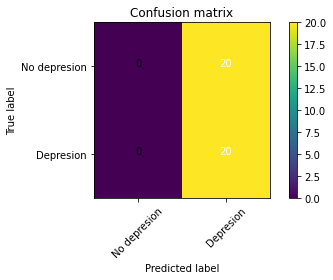

In [ ]:
print(sklearn.metrics.classification_report(test_label,conf_matrix_pred))
cnf_matrix = confusion_matrix(test_label,conf_matrix_pred)
plot_confusion_matrix(cnf_matrix, classes=['No depresion','Depresion'],
                      title='Confusion matrix')

# Build the model (LSTM)

In [ ]:
# LSTM model
model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(128, return_sequences=True),
                        input_shape=(mel_h,mel_w)))
model_lstm.add(Bidirectional(LSTM(64)))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(class_num, activation='softmax'))

model_lstm.summary()
model_lstm.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 129, 256)         3660800   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 3,833,538
Trainable params: 3,833,538
No

In [ ]:
model_lstm.fit(train_mel_cnn, train_label_c,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(val_mel_cnn, val_label_c))
score = model_lstm.evaluate(test_mel_cnn, test_label_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
50/50 [==============================] - 82s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 66s 1s/step - loss: 0.6933 - accuracy: 0.4650 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.6933 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
50/50 [==============================] - 68s 1s/step - loss: 0.6933 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Test loss: 0.6931471824645996
Test accuracy: 0.5


In [ ]:
# show the results on the prediction
pre_result = model_lstm.predict(test_mel_cnn, batch_size=batch_size, verbose=1, steps=None)
# for i in pre_result:
#    print('Predicted value:', i)
conf_matrix_pred = ['']
conf_matrix_pred *= 40
j = 0
for i in pre_result:
    conf_matrix_pred[j] = i.argmax(axis=0)
    print ("Class: " + str(i.argmax(axis=0)))
    j += 1

5/5 [==============================] - 4s 454ms/step
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1
Class: 1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



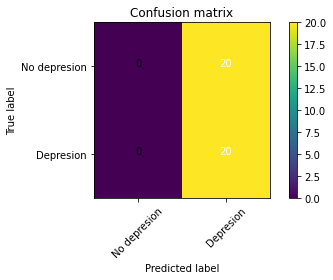

In [ ]:
print(sklearn.metrics.classification_report(test_label,conf_matrix_pred))
cnf_matrix = confusion_matrix(test_label,conf_matrix_pred)
plot_confusion_matrix(cnf_matrix, classes=['No depresion','Depresion'],
                      title='Confusion matrix')

# Test Models (SVM)

In [ ]:
# convert 2-dim matrix into 1-dim array
# use the svm classifier to test
from itertools import chain
from sklearn import svm
from sklearn.svm import SVC
import operator
from functools import reduce

mel_h = 129
mel_w = 3446
train_mel_matrix_r = []
train_label_r = []
for i in range(0,len(train_mel_matrix)):
  try: 
    train_mel_matrix_r.append(np.array(reduce(operator.add, train_mel_matrix[i])))
    train_label_r.append(train_label[i])
  except:
    continue

train_mel_matrix_r = np.array(train_mel_matrix_r)

'''
model_s = svm.SVC(kernel = "rbf") 
model_s.fit(np.array(train_mel_matrix_r), np.array(train_label_r))
model_s.score(train_mel_matrix_r, train_label_r)
predicted = model_s.predict(test_mel_matrix_r)
predicted
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


'\nmodel_s = svm.SVC(kernel = "rbf") \nmodel_s.fit(np.array(train_mel_matrix_r), np.array(train_label_r))\nmodel_s.score(train_mel_matrix_r, train_label_r)\npredicted = model_s.predict(test_mel_matrix_r)\npredicted\n'